# Data Analysis

### SEN9120: Advanced Agent Based Modeling
Cruz Torres Francesco, 4999959
<br> Herzog Rico, 5095530

In [1]:
# Import necessary scintific computing, data analysis and visualization packages
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

In [6]:
for name in sorted(os.listdir("./results")):
    print(name)

.ipynb_checkpoints
outcomes2021-2-14-8-53_300 samples.csv
outcomes2021-2-6-20-18.csv
outcomes2021-2-6-21-00.csv
outcomes2021-2-7-0-32_50 samples.csv
outcomes2021-2-9-3-42_150 samples.csv
outcomes2021-2-9-7-27_150 samples.csv
parameters2021-2-14-8-53_300 samples.csv
parameters2021-2-6-20-18.csv
parameters2021-2-6-21-00.csv
parameters2021-2-7-0-32_50 samples.csv
parameters2021-2-9-3-42_150 samples.csv
parameters2021-2-9-7-27_150 samples.csv


In [7]:
#access all results files and store them in dataframes

count_outcomes = 1
count_parameters = 1

for name in sorted(os.listdir("./results")):
    path = os.path.join("./results", name)
        
    if "outcomes" in name:
        globals()["outcomes_"+str(count_outcomes)] = pd.read_csv(path)
        count_outcomes += 1
        
    elif name == ".ipynb_checkpoints":
        continue
        
    #othwerwise the filename starts with "parameters"
    else:
        globals()["parameters_"+str(count_parameters)] = pd.read_csv(path)
        count_parameters += 1

In [9]:
# for each couple of files (parameters ; outcome) merge the two files together
for i,j in zip(range(1,count_parameters), range(1,count_outcomes)):
    globals()["results_"+str(i)] = pd.merge(globals()["parameters_"+str(i)], globals()["outcomes_"+str(i)], left_on= "Unnamed: 0", right_on= "Run").drop("Unnamed: 0", axis=1)

In [10]:
# adjust the "Run" column such that each run is unique across all results files
results_2["Run"] = results_2["Run"] + results_1["Run"].iloc[-1] + 1
results_3["Run"] = results_3["Run"] + results_2["Run"].iloc[-1] + 1
results_4["Run"] = results_4["Run"] + results_3["Run"].iloc[-1] + 1
results_5["Run"] = results_5["Run"] + results_4["Run"].iloc[-1] + 1
results_6["Run"] = results_6["Run"] + results_5["Run"].iloc[-1] + 1
results_6["Run"]

0        520
1        520
2        520
3        520
4        520
        ... 
14995    669
14996    669
14997    669
14998    669
14999    669
Name: Run, Length: 15000, dtype: int64

In [11]:
# combine all results dataframes into one dataframe, where Run is the unique key column
results = pd.concat([results_1, results_2, results_3, results_4, results_5], axis = 0, )
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Run,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban
0,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,0,15.0,45.0,16.5
1,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,1,10.0,15.0,27.0
2,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,2,15.0,29.0,19.5
3,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,3,10.0,0.0,25.5
4,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,4,10.0,45.0,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,15.0,11.0,-4.0,2.0,2.0,False,519,95,85.0,269.0,262.5
14996,0.0,15.0,11.0,-4.0,2.0,2.0,False,519,96,55.0,179.0,214.5
14997,0.0,15.0,11.0,-4.0,2.0,2.0,False,519,97,50.0,165.0,282.0
14998,0.0,15.0,11.0,-4.0,2.0,2.0,False,519,98,90.0,149.0,253.5


In [12]:
avg_results = results.groupby("Run").mean()
avg_results["MW_Total"] = avg_results.iloc[:, -3:].sum(axis=1)
avg_results.dtypes

administrative-network-meetings     float64
total-project-proposal-frequency    float64
informal-meetings-frequency         float64
green-energy-openness-change        float64
political-variety-change            float64
max-project-capacity                float64
random-intial-trust                    bool
Random Seed                         float64
MW_implemented_wind                 float64
MW_implemented_solar                float64
MW_implemented_urban                float64
MW_Total                            float64
dtype: object

Text(0, 0.5, 'Frequency of administrative \nnetwork meetings \n[1/year]')

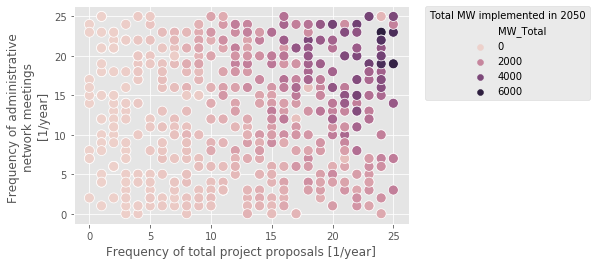

In [13]:


sns.scatterplot(x=avg_results["total-project-proposal-frequency"], y=avg_results["administrative-network-meetings"], hue=avg_results["MW_Total"], s= 100, )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total MW implemented in 2050")
plt.title('')
# Set x-axis label
plt.xlabel('Frequency of total project proposals [1/year]')
# Set y-axis label
plt.ylabel('Frequency of administrative \nnetwork meetings \n[1/year]')

Text(0, 0.5, 'Maximum project capacity of municipalities \n[1/10,000 inhabitants]')

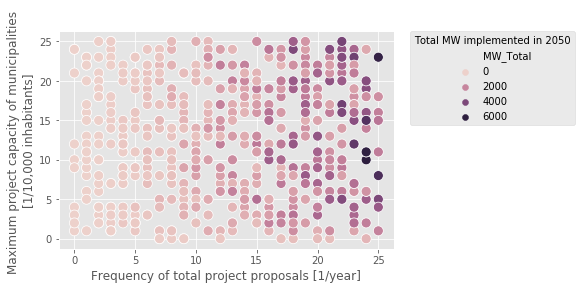

In [14]:
sns.scatterplot(x=avg_results["total-project-proposal-frequency"], y=avg_results["max-project-capacity"], hue=avg_results["MW_Total"], s= 100, )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total MW implemented in 2050")
plt.title('')
# Set x-axis label
plt.xlabel('Frequency of total project proposals [1/year]')
# Set y-axis label
plt.ylabel('Maximum project capacity of municipalities \n[1/10,000 inhabitants]')